In [1]:
import os # importing os
os.getcwd()  #getting current directory

'/content'

In [2]:
import numpy as np #good for maths(stds)

import pandas as pd #excellent for dataset manupalation

# for data visulization
import matplotlib.pyplot as plt

import seaborn as sns

#Labelencoding to convert categorical data into lowlevel language
from sklearn.preprocessing import LabelEncoder

#scaling data
from sklearn.preprocessing import StandardScaler

#data partions
from sklearn.model_selection import train_test_split

#algorithams
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


#accuracy confusion matric and classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df=pd.read_csv(r"/content/drive/MyDrive/datasets/diabetes_prediction_dataset.csv")   #Reading csv file

In [5]:
df.head() #it displace the first 5 rows

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.isna().any() #checking is there any null values

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [7]:
df.corr(numeric_only=True) #correlation

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [8]:
df.shape #shape of the dataframe

(100000, 9)

Checking all unique elements

In [9]:
for column in df.columns: # itreating each column in df.columns
    unique_values = df[column].unique() #finding unique values of each column

    #printing unique values
    print('Column "{}" has unique values: {}'.format(column, unique_values))

Column "gender" has unique values: ['Female' 'Male' 'Other']
Column "age" has unique values: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Column "hypertension" has unique values: [0 1]
Column "heart_disease" has unique values: [1 0]
Column "smoking_history" has unique values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Column "bmi" has unique values: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
Column "HbA1c_level" h

In [10]:
df["smoking_history"].value_counts() #Value count of smoking _history parameter it has no info parameter

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [11]:
df["smoking_history"].value_counts()/len(df) #finding the percentage

smoking_history
No Info        0.35816
never          0.35095
former         0.09352
current        0.09286
not current    0.06447
ever           0.04004
Name: count, dtype: float64

In [12]:

# Replaceing No Info columns with pd.NA
df['smoking_history'] = df['smoking_history'].replace('No Info', pd.NA)

# Replace missing values with the mode it is string so we are using mode
mode_value = df['smoking_history'].mode()[0]
df['smoking_history'] = df['smoking_history'].fillna(mode_value) #filling no info values

# Printing the updated value counts
print(df['smoking_history'].value_counts())


smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [13]:
df.info() #information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
df.gender.value_counts() #Gender value_counts

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [15]:
df.describe() #descripation

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [16]:
#removing , in bmi parameter
df["bmi"] = [float(str(i).replace(",", "")) for i in df["bmi"]]


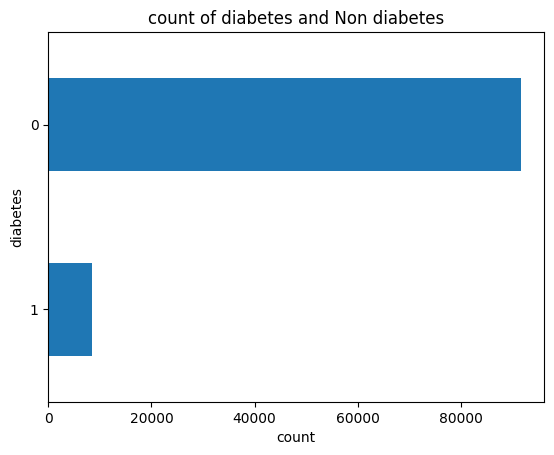

In [17]:
#ploting value_counts of diabetes in graphical representation
df['diabetes'].value_counts().plot(kind='barh')

#Xlabel name
plt.xlabel('count')

#ylabel name
plt.ylabel('diabetes')

#title of the plot
plt.title('count of diabetes and Non diabetes')

#invert ylabes to no diabetes on top
plt.gca().invert_yaxis()

#printing the plot
plt.show()

In [18]:
df['diabetes'].value_counts()/len(df) #percentage of 1--diabetes and 2--no diabetes

diabetes
0    0.915
1    0.085
Name: count, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [20]:
le=LabelEncoder() #activating label encoder function

le

LabelEncoder()

In [21]:
Label_encod_columns=['gender','smoking_history']  #selecting columns to apply labelencoder in next step

df[Label_encod_columns]=df[Label_encod_columns].apply(le.fit_transform) #applying label encoding

In [22]:
df.head(3) # printing top 3 columns to confirm to check labelencoder

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0


<Axes: >

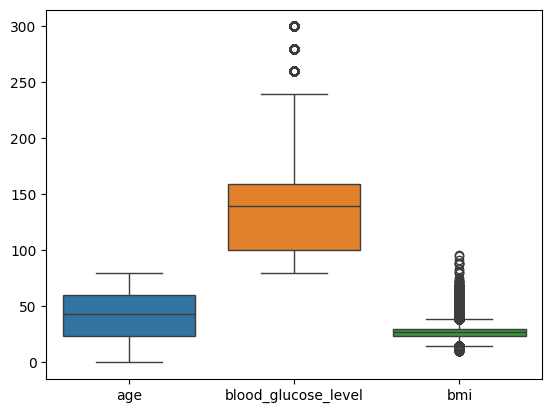

In [23]:
sns.boxplot(data=df[['age','blood_glucose_level','bmi']]) #checking outliers using boxplot

<Axes: ylabel='HbA1c_level'>

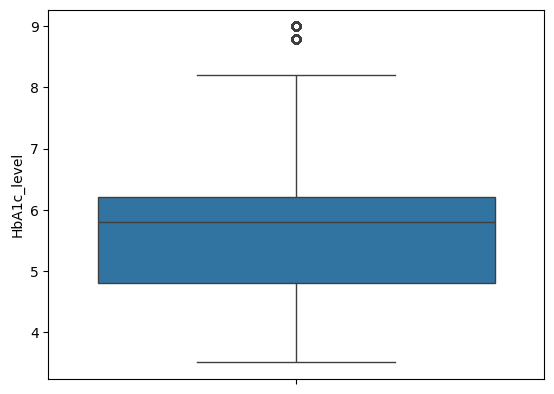

In [24]:
sns.boxplot(data=df['HbA1c_level']) #checking outlayers using boxplot

In [25]:
''' it is always good to ignore outliers in medical data '''

' it is always good to ignore outliers in medical data '

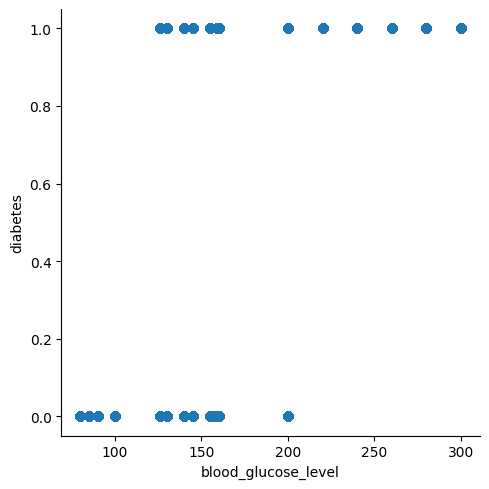

In [26]:
sns.lmplot(data=df, x='blood_glucose_level', y='diabetes', fit_reg=False)#implot plot

In [27]:
#sns.pairplot(df) #using pairplot to check relation between parameters

#print the pairplot
#plt.show()

In [28]:
'''when age increase hypertension and hert disease ,blood_glucose_level and diabetes and age  and also the is a
   relationship between them

    *bmi

    *HbA1c_level

    *blood_glucose_level

    these four paramers have relationship between each other

    *gender and smokling history it doesnot effect on diabetes

'''

'when age increase hypertension and hert disease ,blood_glucose_level and diabetes and age  and also the is a\n   relationship between them\n\n    *bmi\n\n    *HbA1c_level\n\n    *blood_glucose_level\n\n    these four paramers have relationship between each other\n\n    *gender and smokling history it doesnot effect on diabetes\n\n'

In [29]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.044081,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,-0.098969,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,-0.048631,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,-0.048253,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.044081,-0.098969,-0.048631,-0.048253,1.000000,-0.087735,-0.017534,-0.022985,-0.049841
bmi,-0.022994,0.337396,0.147666,0.061198,-0.087735,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,-0.017534,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,-0.022985,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,-0.049841,0.214357,0.400660,0.419558,1.000000


<Axes: >

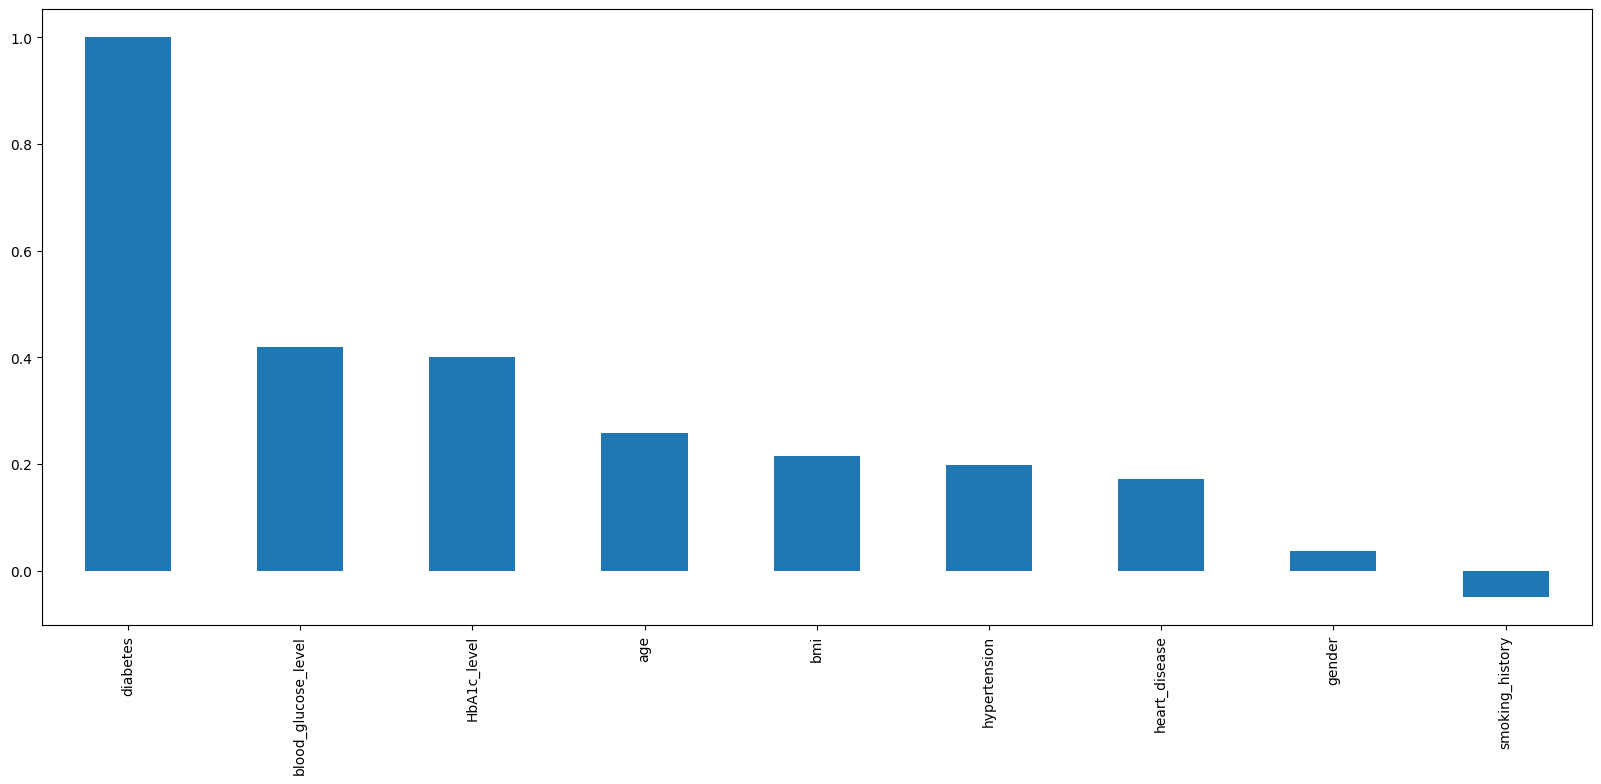

In [30]:
plt.figure(figsize=(20,8)) #figsize

#printing graphical representations of
df.corr()['diabetes'].sort_values(ascending=False).plot(kind='bar')

In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [32]:

#selecting X variables
X = df.loc[:, 'age':'heart_disease'].join(df.loc[:, 'bmi':'blood_glucose_level'])


X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [33]:
y=df.loc[:,'diabetes']  #y variable

y #printing y variable

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

Data partision

In [34]:
# spliting trining and testing data in 70 30 rating testing size is 0.3 random_state=42

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
X_train.head() #printing X_train data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
76513,49.0,0,0,27.32,5.0,155
60406,64.0,0,0,27.32,3.5,145
27322,24.0,0,0,27.32,3.5,130
53699,55.0,0,0,27.32,6.5,159
65412,14.0,0,0,20.98,6.2,85


In [36]:
print('Shape of Train data')

print(X_train.shape)

print(y_train.shape)

print('Shape of Testing data')

print(X_test.shape)

print(y_test.shape)

Shape of Train data
(70000, 6)
(70000,)
Shape of Testing data
(30000, 6)
(30000,)


In [37]:
ss=StandardScaler() #activating StandardScaler()

ss

StandardScaler()

In [38]:
X_train_scaled=ss.fit_transform(X_train) #scaling X_train data

In [39]:
if len(X_test.shape) == 1:   #if x is 1d array
    X_test = X_test.values.reshape(-1, 1) #converting to 2d array

X_test_scaled = ss.fit_transform(X_test) #scaling X_test data

In [40]:
model_lr=LogisticRegression()  #activating logistic Regression


In [41]:
model_lr.fit(X_train_scaled,y_train) #training logistic regression model

LogisticRegression()

In [42]:
y_pred=model_lr.predict(X_test_scaled) #predecting y_test data
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [43]:
y_test[:10] # actual y_test data

75721    0
80184    0
19864    0
76699    0
92991    1
76434    0
84004    0
80917    0
60767    0
50074    0
Name: diabetes, dtype: int64

In [44]:
accuracy_score(y_pred,y_test) #accuracy_score

0.9587333333333333

In [45]:
print(classification_report(y_pred,y_test)) #classifiaction_report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28183
           1       0.61      0.86      0.72      1817

    accuracy                           0.96     30000
   macro avg       0.80      0.91      0.85     30000
weighted avg       0.97      0.96      0.96     30000



''' As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)'''


'''main advantage of using SMOTEENN is that it addresses both overfitting and underfitting issues that can arise from class imbalance. By generating synthetic samples and removing noisy ones'''


In [46]:
confusion_matrix(y_pred,y_test) #confusion_matrix

array([[27199,   984],
       [  254,  1563]])

In [47]:
y_train.value_counts() #data is highly imblancing

diabetes
0    64047
1     5953
Name: count, dtype: int64

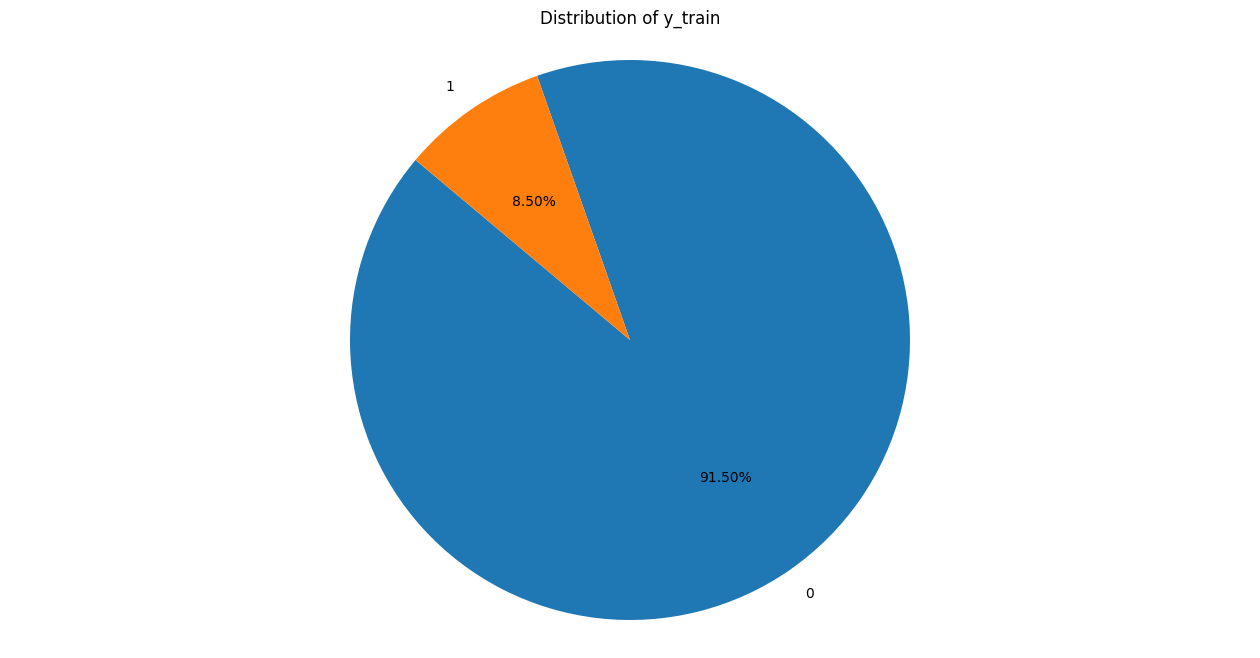

In [48]:
value_counts=y_train.value_counts()

plt.figure(figsize=(16, 8))

plt.pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', startangle=140)

plt.title('Distribution of y_train')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

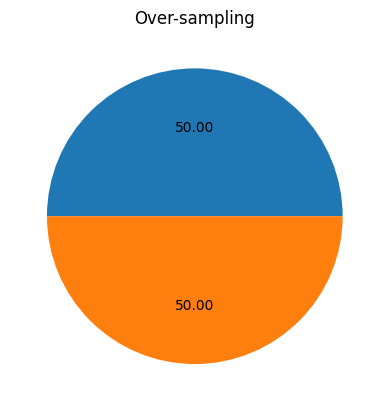

In [49]:
#import imblearn
import sklearn
from imblearn.over_sampling import SMOTE # using smote function to balance our set
#import imblearn.over_sampling as smote

smote=SMOTE()

X_ovs,y_ovs=smote.fit_resample(X,y) #passing X and y variables to it to balance out data to 50 50

fig, oversp = plt.subplots()

oversp.pie( y_ovs.value_counts(), autopct='%.2f')

oversp.set_title("Over-sampling")

plt.show()


In [50]:
# Dividing our resampling data into 70 30 ratio

Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_ovs,y_ovs,train_size=0.7,random_state=42)

In [51]:
print('train data shape')

print(Xr_train.shape)

print(yr_train.shape)

print('test data shape')

print(Xr_test.shape)

print(yr_test.shape)

train data shape
(128099, 6)
(128099,)
test data shape
(54901, 6)
(54901,)


In [52]:
print('y_train and y_test value_count')
print(yr_train.value_counts())
print(yr_test.value_counts())


y_train and y_test value_count
diabetes
0    64131
1    63968
Name: count, dtype: int64
diabetes
1    27532
0    27369
Name: count, dtype: int64


In [53]:
ss=StandardScaler()

ss

StandardScaler()

In [54]:
data=Xr_train,Xr_test



xr_train_sc=ss.fit_transform(Xr_train) # scaling our resampling data xr train


Xr_test_sc=ss.fit_transform(Xr_test) # scaling our resamplig xr_test data

In [55]:
Xr_train_scaled = pd.DataFrame(xr_train_sc) #Xr_train_scaled converting into the data frame

print(Xr_train_scaled.shape)
Xr_train_scaled.head()
print(yr_train.shape)

(128099, 6)
(128099,)


In [56]:
Xr_test_scaled=pd.DataFrame(Xr_test_sc) #Xr_test converting into the dataframe

print(Xr_test_scaled.shape)
Xr_test_scaled.head()

(54901, 6)


,0,1,2,3,4,5
0,0.393066,-0.292209,-0.204509,-0.764186,1.101923,2.046191
1,-1.094388,-0.292209,-0.204509,-0.403655,0.369522,-0.059513
2,-1.466251,-0.292209,-0.204509,-0.286362,0.369522,-1.463316
3,-0.769007,3.422208,-0.204509,0.291921,0.369522,-1.375578
4,-1.373285,-0.292209,-0.204509,-0.286362,-2.153194,-1.112365


In [57]:
model_lk=LogisticRegression()


model_lk.fit(Xr_train_scaled,yr_train)  #trining the model

LogisticRegression()

In [58]:
y_pred_lr=model_lk.predict(Xr_test_scaled) #predecting yr_test data
y_pred_lr[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [59]:
yr_test[:10]

180328    1
573       0
13494     0
93981     0
75389     0
180973    1
71021     0
19293     0
16393     0
121419    1
Name: diabetes, dtype: int64

In [60]:
#classification_report for predict value and orginal value

print(classification_report(y_pred_lr,yr_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27370
           1       0.88      0.88      0.88     27531

    accuracy                           0.88     54901
   macro avg       0.88      0.88      0.88     54901
weighted avg       0.88      0.88      0.88     54901



after using smote function now our model is good precision , recall , f1-score, support is good we got excate results for all the matrics lets perform with other algo

In [61]:
#confusion_matrix for predict value and orginal value

confusion_matrix(y_pred_lr,yr_test)

array([[24165,  3205],
       [ 3204, 24327]])

#### DecisionTreeClassifier

In [62]:
# activating DecisionTree Classifier
model_dtc=DecisionTreeClassifier()

# passing xr_train_scaled, yr_train to trining the model
model_dtc.fit(Xr_train_scaled,yr_train)

model_dtc

DecisionTreeClassifier()

In [63]:
y_pred_dtc=model_dtc.predict(Xr_test_scaled) # predicting yr_test data

In [64]:
# classification report for decisionTreeclassifier

print(classification_report(y_pred_dtc,yr_test))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     20231
           1       0.99      0.79      0.88     34670

    accuracy                           0.86     54901
   macro avg       0.86      0.89      0.86     54901
weighted avg       0.90      0.86      0.86     54901



In [65]:
confusion_matrix(y_pred_dtc,yr_test)

array([[20025,   206],
       [ 7344, 27326]])

#### RandomForestClassifier()

In [66]:
model_rfc=RandomForestClassifier() #activating the fuction

model_rfc.fit(Xr_train_scaled,yr_train)

RandomForestClassifier()

In [67]:
y_pred_rfc=model_rfc.predict(Xr_test_scaled)

In [68]:
print(classification_report(y_pred_rfc,yr_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     24963
           1       0.99      0.91      0.94     29938

    accuracy                           0.94     54901
   macro avg       0.94      0.95      0.94     54901
weighted avg       0.95      0.94      0.94     54901



In [69]:
confusion_matrix(y_pred_rfc,yr_test)

array([[24582,   381],
       [ 2787, 27151]])

#### XGBOOST

In [70]:
model_xgb=XGBClassifier()

model_xgb.fit(Xr_train_scaled,yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred_xgb=model_xgb.predict(Xr_test_scaled)

In [72]:
print(classification_report(y_pred_xgb,yr_test))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79     18857
           1       0.98      0.75      0.85     36044

    accuracy                           0.82     54901
   macro avg       0.82      0.86      0.82     54901
weighted avg       0.87      0.82      0.83     54901



In [73]:
confusion_matrix(y_pred_xgb,yr_test)

array([[18291,   566],
       [ 9078, 26966]])

## finding the hyperparameter tuning and best param grid

In [79]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']                # Penalty type
}

# Create a Logistic Regression model
logistic = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=10)

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

# Perform cross-validation 10 times
for _ in range(10):
    # Fit the GridSearchCV object to the training data
    grid_search.fit(Xr_train_scaled, yr_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Perform cross-validation with the best model
    cv_scores = cross_val_score(grid_search.best_estimator_, Xr_train_scaled, yr_train, cv=10)

    # Store the mean accuracy score
    accuracy_scores.append(cv_scores.mean())

# Print the accuracy scores obtained over 10 iterations
#print("Accuracy scores over 10 iterations:", accuracy_scores)
print("Accuracy scores over 10 iterations:", ["{:.2f}".format(score) for score in accuracy_scores])


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best cross-validation score:", best_score)


Accuracy scores over 10 iterations: ['0.88', '0.88', '0.88', '0.88', '0.88', '0.88', '0.88', '0.88', '0.88', '0.88']
Best parameters found: {'C': 0.001, 'penalty': 'l2'}
Best cross-validation score: 0.8849639801834789


## FINAL MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with the best parameters
final_model = LogisticRegression(C=0.001, penalty='l2')

# Fit the final model to the entire training dataset
final_model.fit(Xr_train_scaled, yr_train)


LogisticRegression(C=0.001)

In [ ]:
import pickle

# Save the final model to a pickle file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)


In [ ]:
import pickle
import numpy as np

# Load the model from the pickle file
with open('final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Define the mean and standard deviation of the training data
mean_values = [41.885856, 0.07485, 0.03942, 27.320767, 5.527507, 138.058060]
std_values = [22.516840, 0.26315, 0.194593, 6.636783, 1.070672, 40.708136]

# Define the input features for prediction
age = 30
hypertension = 0
heart_disease = 0
bmi = 100.0
HbA1c_level = 5.0
blood_glucose_level = 90

# Scale the input features manually
scaled_features = [(x - mean) / std for x, mean, std in zip(
    [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level],
    mean_values, std_values
)]

# Make predictions on the scaled data
prediction = loaded_model.predict([scaled_features])

# Print the prediction
if prediction[0] == 1:
    print("Diabetic")
else:
    print("Not Diabetic")


Diabetic
